# Feature


In [11]:
import pandas as pd

ppga_df = pd.read_csv(
    "../results/performance/ppga_RandomForestClassifier_feature_final2.csv"
)
ppga_df.sort_values(
    by=[
        "point",
        "features",
        "class",
        "target",
        "classifier",
        "population_size",
    ]
)

,point,features,class,target,classifier,population_size,workers,time,time_std,ptime,ptime_std
20,0,2,1,0,RandomForestClassifier,4000,1,237.763066,0.636510,118.713016,0.318399
80,0,2,1,0,RandomForestClassifier,4000,2,61.395010,1.354572,60.437500,1.347500
140,0,2,1,0,RandomForestClassifier,4000,4,31.207386,0.241203,29.846250,0.266250
200,0,2,1,0,RandomForestClassifier,4000,8,17.457943,0.113280,15.120000,0.067500
260,0,2,1,0,RandomForestClassifier,4000,16,12.357899,0.434525,7.870938,0.018438
...,...,...,...,...,...,...,...,...,...,...,...
69,4,64,1,1,RandomForestClassifier,4000,2,61.353842,0.538300,59.787500,0.517500
129,4,64,1,1,RandomForestClassifier,4000,4,31.832446,0.359049,29.980000,0.082500
189,4,64,1,1,RandomForestClassifier,4000,8,18.443734,0.044108,15.310000,0.138750
249,4,64,1,1,RandomForestClassifier,4000,16,13.887762,0.427971,7.945312,0.000938


In [8]:
deap_df = pd.read_csv(
    "../results/performance/deap_RandomForestClassifier_feature_final2.csv"
)
deap_df

,point,features,class,target,classifier,population_size,workers,time,time_std,ptime,ptime_std
0,0,64,1,0,RandomForestClassifier,4000,1,154.010743,0.036036,0.000731,1.097000e-05
1,0,64,1,1,RandomForestClassifier,4000,1,154.928481,0.222263,0.000733,4.383000e-06
2,1,64,0,0,RandomForestClassifier,4000,1,155.273411,0.146944,0.000763,1.697150e-05
3,1,64,0,1,RandomForestClassifier,4000,1,156.527272,0.944546,0.000730,1.093600e-05
4,2,64,0,0,RandomForestClassifier,4000,1,155.197000,0.105526,0.000731,1.717000e-06
5,2,64,0,1,RandomForestClassifier,4000,1,154.311491,1.166579,0.000754,8.626000e-06
6,3,64,0,0,RandomForestClassifier,4000,1,154.673751,0.114508,0.000737,1.324550e-05
7,3,64,0,1,RandomForestClassifier,4000,1,153.413501,0.286740,0.000736,1.294900e-05
8,4,64,1,0,RandomForestClassifier,4000,1,153.628517,0.221809,0.000742,9.805005e-07
9,4,64,1,1,RandomForestClassifier,4000,1,154.406305,0.309941,0.000776,9.614996e-07


In [5]:
def group(df: pd.DataFrame) -> pd.DataFrame:
    df = (
        df.groupby(by=["classifier", "features", "population_size", "workers"])[
            ["time", "time_std", "ptime", "ptime_std"]
        ]
        .mean()
        .reset_index()
    )

    return df


ppga_df = group(ppga_df)
deap_df = group(deap_df)

/tmp/ipykernel_11289/2446958335.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  t = deap_df[mask]["time"]


ValueError: x and y must have same first dimension, but have shapes (6,) and (1,)

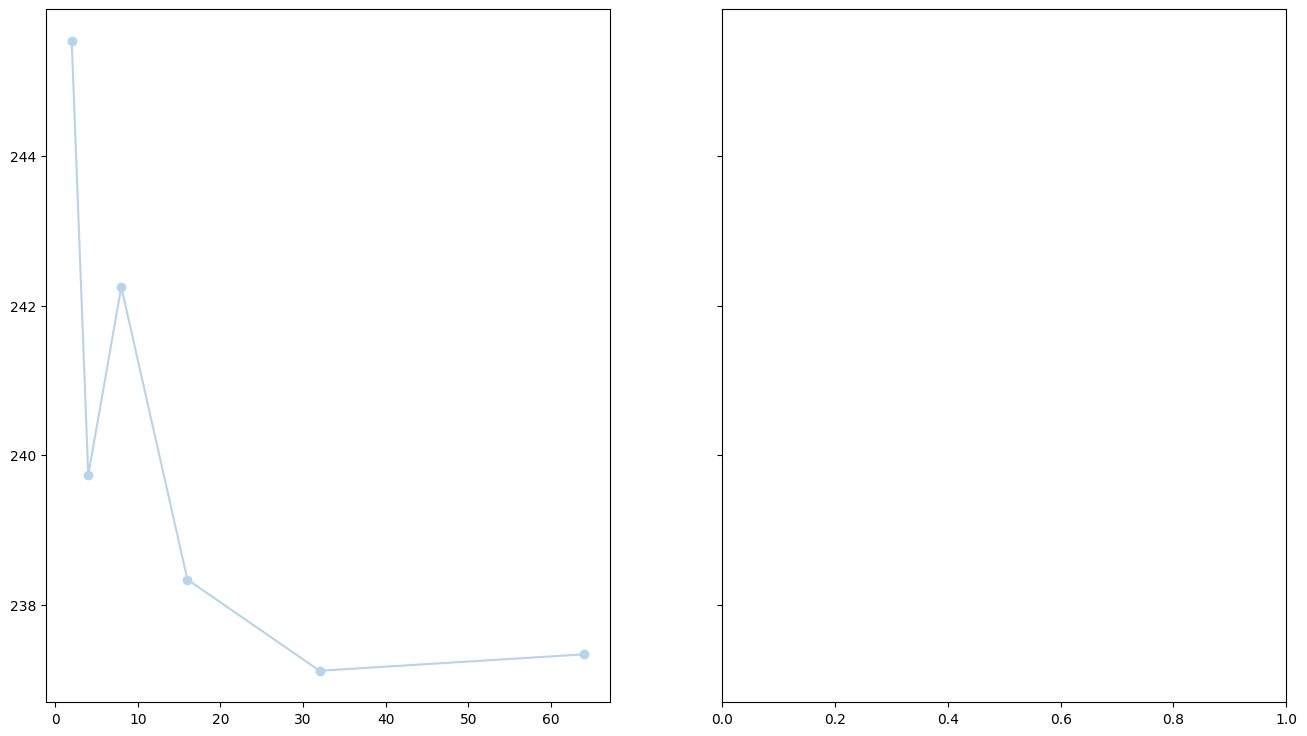

In [6]:
import matplotlib.pyplot as plt
import numpy as np


def plot_time(ppga_df: pd.DataFrame, deap_df: pd.DataFrame):
    models = ppga_df["classifier"].unique()
    fig, axes = plt.subplots(len(models), 2, sharey=True, figsize=(16, 9))

    features = ppga_df["features"].unique()
    workers = ppga_df["workers"].unique()

    ppga_color = plt.cm.Blues(np.linspace(0.3, 0.7, len(workers)))
    deap_color = plt.cm.Reds(np.linspace(0.3, 0.7, len(workers)))

    for i, m in enumerate(models):
        for j, w in enumerate(workers):
            mask = ppga_df["workers"] == w
            f = ppga_df[mask]["features"]

            # Total time
            t = ppga_df[mask]["time"]
            axes[0].plot(
                f, t, color=ppga_color[j], marker="o", label=f"PPGA {w} workers"
            )

            t = deap_df[mask]["time"]
            axes[0].plot(
                f, t, color=deap_color[j], marker="s", label=f"DEAP {w} workers"
            )

            axes[0].set_title(f"{m} Total Time")
            axes[0].set_xlabel("Features")
            axes[0].set_ylabel("Time (seconds)")
            axes[0].set_xscale("log", base=2)
            axes[0].set_xticks(features, labels=features)
            axes[0].legend()
            axes[0].grid(True)

            # Parallel time
            t = ppga_df[mask]["ptime"]
            axes[1].plot(
                f, t, color=ppga_color[j], marker="o", label=f"PPGA {w} workers"
            )

            t = deap_df[mask]["ptime"]
            axes[1].plot(
                f, t, color=deap_color[j], marker="s", label=f"DEAP {w} workers"
            )

            axes[1].set_title(f"{m} Parallel Time")
            axes[1].set_xlabel("Features")
            axes[1].set_ylabel("Time (seconds)")
            axes[1].set_xscale("log", base=2)
            axes[1].set_xticks(features, labels=features)
            axes[1].legend()
            axes[1].grid(True)

    plt.tight_layout()
    plt.show()


plot_time(ppga_df, deap_df)